In [1]:
using StaticArrays
using LinearAlgebra
# using Makie
using GLMakie 
using LsqFit
include("Elastic.jl")
using .Elastic
using DelimitedFiles
using Distributions
using Statistics
using Plots
using Test
using IterTools
using BenchmarkTools

using LaTeXStrings


In [2]:
atom_positions = [
    Vector([0.0, 0.0, 0.0]),
    Vector([0.0, 0.5, 0.5]),
    Vector([0.5, 0.0, 0.5]),
    Vector([0.5, 0.5, 0.0]),
    Vector([1.0, 0.0, 0.0]),
    Vector([0.0, 1.0, 0.0]),
    Vector([0.0, 0.0, 1.0]),
    Vector([0.5, 1.0, 0.5]),
    Vector([1.0, 0.5, 0.5]),
    Vector([0.5, 0.5, 1.0]),
    Vector([1.0, 0.0, 1.0]),
    Vector([1.0, 1.0, 0.0]),
    Vector([0.0, 1.0, 1.0]),
    Vector([1.0, 1.0, 1.0])
] 
kb=8.617332385e-5 #eV/K
amuM=1.03642701e-4 #[m]/amu
Mcu=26.9815385 #amu
lattice_constant = 4.032 #A

# 定义铜的FCC晶胞的基矢量
lattice_vectors = collect((Matrix([
    lattice_constant 0.0 0.0; #a1
    0.0 lattice_constant 0.0; #a2
    0.0 0.0 lattice_constant] #a3
))')

# 创建铜的原子列表
atoms = [Atom(pos,Mcu*amuM) for pos in atom_positions]


cell=UnitCell(lattice_vectors,atoms)
cpcell=copycell(cell,1,1,1)
fcell=filtercell(cpcell)
visualize_unitcell_atoms(fcell)

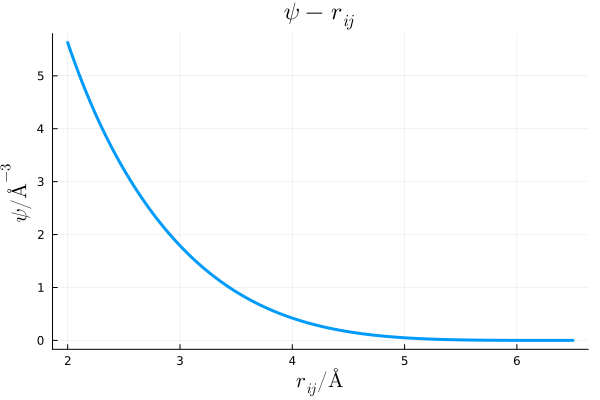

In [3]:
xx=2.0:0.001:6.5
y=EMAAl2_psi.(xx)
Plots.plot(xx,y,label="",xlabel=L"r_{ij}/\mathrm{\AA}",ylabel=L"\psi/\mathrm{\AA^{-3}}",title=L"\psi-r_{ij}", xlabelfontsize=14, ylabelfontsize=14, titlefontsize=16,lw=3)

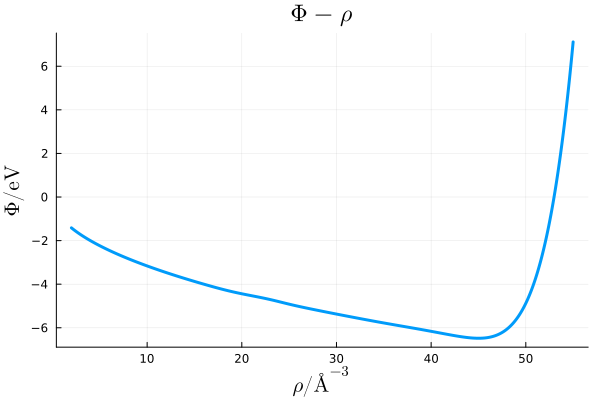

In [4]:
xx=2.0:0.001:55.0
y=EMAAl2_Phi.(xx)
Plots.plot(xx,y,label="",xlabel=L"\rho/\mathrm{\AA^{-3}}",ylabel=L"\Phi/\mathrm{eV}",title=L"\Phi-\rho", xlabelfontsize=14, ylabelfontsize=14, titlefontsize=16,lw=3)

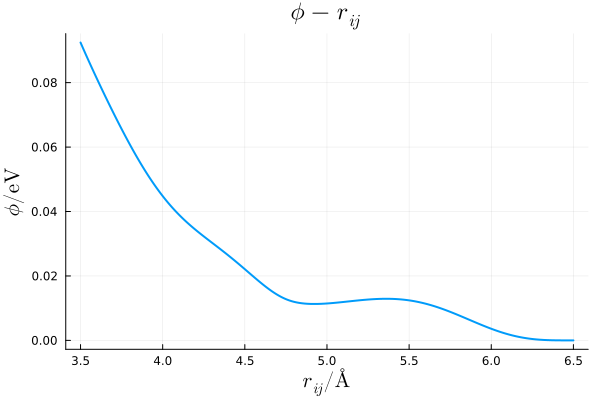

In [5]:
ct=6.5
embeddingAl2=Embedding(embedding_energyAl2, embedding_forceAl2i)
interaction=Interaction(EMAAl2_phi, EMAAl2_phi_gradient, ct, 0.1, embeddingAl2)
xx=3.5:0.001:6.5
y=interaction.cutenergy.(xx)
Plots.plot(xx,y,label="",xlabel=L"r_{ij}/\mathrm{\AA}",ylabel=L"\phi/\mathrm{eV}",title=L"\phi-r_{ij}", xlabelfontsize=14, ylabelfontsize=14, titlefontsize=16,lw=2)


In [6]:
pressure_int(fcell,interaction)

-0.00320811637185200532086285268907035760450838391299553610839041807808071753475624

In [7]:
dUdhij(fcell,interaction,BigFloat("1e-5"))

3×3 Matrix{Float64}:
 2.08473e-5  1.76226e-9  1.93848e-9
 2.11471e-9  2.08477e-5  1.40981e-9
 1.76226e-9  1.58603e-9  2.08479e-5

In [8]:
cl,El=minimizeEnergy!(fcell, interaction,rg=[3.8,4.5])

(3.8:0.0007007007007007007:4.5, [-105.04887447674216, -105.08664312270605, -105.12427151191234, -105.16175962919297, -105.19910746568777, -105.23631501853329, -105.27338229079112, -105.31030929151143, -105.34709603597815, -105.38374254498919  …  -103.86042687589149, -103.83860781626439, -103.8167587458907, -103.79488004017145, -103.77297207327764, -103.75103521793102, -103.7290698457861, -103.70707632684719, -103.68505502975168, -103.66300632165033])

In [9]:
fcell

UnitCell([4.0627627627627625 0.0 0.0; 0.0 4.0627627627627625 0.0; 0.0 0.0 4.0627627627627625], Atom[Atom([-1.0, -1.0, -1.0], [0.0, 0.0, 0.0], 0.0027964395272754884, 8, [1, 1, 1]), Atom([-1.0, -1.0, 0.0], [0.0, 0.0, 0.0], 0.0027964395272754884, 4, [1, 1, 0]), Atom([-1.0, 0.0, -1.0], [0.0, 0.0, 0.0], 0.0027964395272754884, 4, [1, 0, 1]), Atom([-1.0, 0.0, 0.0], [0.0, 0.0, 0.0], 0.0027964395272754884, 2, [1, 0, 0]), Atom([0.0, -1.0, -1.0], [0.0, 0.0, 0.0], 0.0027964395272754884, 4, [0, 1, 1]), Atom([0.0, -1.0, 0.0], [0.0, 0.0, 0.0], 0.0027964395272754884, 2, [0, 1, 0]), Atom([0.0, 0.0, -1.0], [0.0, 0.0, 0.0], 0.0027964395272754884, 2, [0, 0, 1]), Atom([0.0, 0.0, 0.0], [0.0, 0.0, 0.0], 0.0027964395272754884, 1, [0, 0, 0]), Atom([-1.0, -0.5, -0.5], [0.0, 0.0, 0.0], 0.0027964395272754884, 2, [1, 0, 0]), Atom([-1.0, -0.5, 0.5], [0.0, 0.0, 0.0], 0.0027964395272754884, 2, [1, 0, 0])  …  Atom([0.5, 0.0, -0.5], [0.0, 0.0, 0.0], 0.0027964395272754884, 1, [0, 0, 0]), Atom([0.5, 0.0, 0.5], [0.0, 0.0,

In [11]:
ft=force_tensor(fcell,interaction)

3×3 Matrix{Float64}:
 -0.00202215   -3.96972e-19  -4.23437e-19
 -2.64648e-20  -0.00202215    0.0
  0.0           0.0          -0.00202215

In [11]:
# 生成 LaTeX 字符串
latex_matrix = matrix_to_latex(ft)

L"$\left[\begin{matrix}-0.002022147887292377 & -3.9697206327755704e-19 & -4.2343686749606084e-19 \\ -2.6464804218503802e-20 & -0.0020221478872923843 & 0.0 \\ 0.0 & 0.0 & -0.002022147887292448\end{matrix}\right]$"

In [12]:
dUdhij(fcell,interaction)

3×3 Matrix{Float64}:
 2.13875e-5  7.87012e-9  7.52034e-9
 7.52034e-9  2.13875e-5  7.69523e-9
 7.69523e-9  7.69523e-9  2.13877e-5

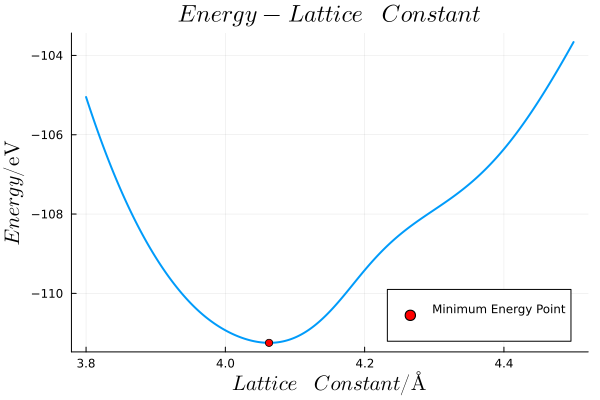

In [13]:
Plots.plot(cl,El,label="",xlabel=L"Lattice \quad Constant/\mathrm{\AA}",ylabel=L"Energy/\mathrm{eV}",title=L"Energy-Lattice \quad Constant", xlabelfontsize=14, ylabelfontsize=14, titlefontsize=16,lw=2)
minindex=argmin(El)
Plots.scatter!([cl[minindex]],[El[minindex]],label="Minimum Energy Point\n",color=:Red)

In [38]:
cell=deepcopy(fcell)
dm=deform_mat(4,0.001)
deform_cell!(cell,dm)

3×3 Matrix{Float64}:
 4.06276  0.00406276  0.0
 0.0      4.06276     0.0
 0.0      0.0         4.06276

In [27]:
cell_energy(fcell,interaction)

-111.2470801257442

In [28]:
cell_energy(cell,interaction)

-111.0937566619514

In [39]:
El=gradientDescent!(cell,interaction)

step=10,E=-111.34857094204445
step=20,E=-111.39652189955459
step=30,E=-111.41500164434316
step=40,E=-111.42211516631446
step=50,E=-111.42485201158664
step=60,E=-111.42590562210655
step=70,E=-111.42631173557322
step=80,E=-111.4264685018303
step=90,E=-111.42652910860737
step=100,E=-111.42655257673783
step=110,E=-111.42656168018105
step=120,E=-111.42656521934092
step=130,E=-111.42656659958375
step=140,E=-111.42656714045296
step=150,E=-111.42656735403513
step=160,E=-111.4265674394388
step=170,E=-111.4265674742883
step=180,E=-111.42656748896556
step=190,E=-111.42656749543936
Energy is converge within 1000 steps of tol=1.0e-8 !


19-element Vector{Float64}:
 -111.34857094204445
 -111.39652189955459
 -111.41500164434316
 -111.42211516631446
 -111.42485201158664
 -111.42590562210655
 -111.42631173557322
 -111.4264685018303
 -111.42652910860737
 -111.42655257673783
 -111.42656168018105
 -111.42656521934092
 -111.42656659958375
 -111.42656714045296
 -111.42656735403513
 -111.4265674394388
 -111.4265674742883
 -111.42656748896556
 -111.42656749543936

In [37]:
force_tensor(cell,interaction)

3×3 Matrix{Float64}:
 -2.17949e-7  -4.49384e-7    1.82971e-10
 -4.50471e-7  -1.65574e-7   -5.77275e-10
  4.9424e-9   -2.27677e-10  -9.77164e-9

In [41]:
force_tensor(cell,interaction)

3×3 Matrix{Float64}:
 -2.64199e-7   3.05172e-8  -4.91645e-8
  1.20945e-7  -2.6468e-7    1.53639e-8
  8.70931e-8  -2.44311e-9  -2.45112e-7

In [ ]:
function gradientDescent!(cell::UnitCell,interaction::Interaction,method="adam";ap::Float64=0.001,beta1::Float64=0.9,beta2::Float64=0.999,eps::Float64=1e-8,tol=1e-6,maxiter=1000,checktime=10)
    El=Vector{Float64}([])
    converge=false
    natom=length(cell.atoms)
    mt=fill(zeros(3),natom)
    vt=fill(zeros(3),natom)

    for s in 1:maxiter
        gradientStep(cell,interaction,ap=ap)
        if mod(s,checktime)==0
            Ei=cell_energy(cell,interaction)
            println("$step=$s,E=$Ei")
            push!(El,Ei)
            if s>checktime
                if abs(El[end]-El[end-1])<tol
                    converge=true
                    break
                end
            end
        end
    end
    if !converge
        println("Warning!Energy is not converge within $maxiter steps of tol=$tol!")
    end
    return El
end

In [44]:
function gradientStep!(cell::UnitCell,interaction::Interaction,t::Int,mt::Vector{Vector{Float64}},vt::Vector{Vector{Float64}},method="adam";ap::Float64=0.001,beta1::Float64=0.9,beta2::Float64=0.999,eps::Float64=1e-8)
    ltv=cell.lattice_vectors
    invlt=inv(ltv)
    m=cell.atoms[1].mass
    cp=cell.copy
    fl=fill(zeros(3),length(cell.atoms))
     for i in eachindex(cell.atoms)
        fi=cell_forcei(cell,interaction,i)
        fl[i]=deepcopy(fi)
        mt[i]=beta1.*mt[i]+(1.0-beta1).*fi
        vt[i]=beta2.*vt[i]+(1.0-beta2).*fi.^2
     end

     for i in eachindex(cell.atoms)
        mth=mt[i]./(1.0-beta1)
        
        cell.atoms[i].position+=ap*invlt*fl[i]
        for k in 1:3
         cell.atoms[i].position[k]=mod(cell.atoms[i].position[k]+cp[k],2*cp[k])-cp[k]
         end
     end 
end

gradientStep (generic function with 2 methods)

gradientStep! (generic function with 1 method)

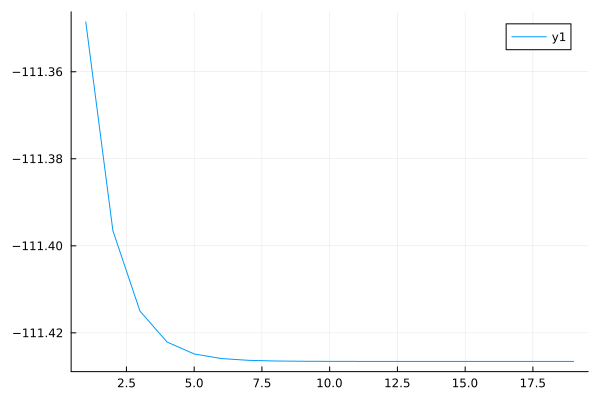

In [40]:
Plots.plot(El)

In [18]:
for i in 1:length(cell.atoms)
    cell.atoms[i].position+=0.1*randn(3)
end

In [23]:
# 定义矩阵
matrix = [1 2 3; 4 5 6; 7 8 9]

# LaTeX 格式化矩阵的字符串
latex_matrix = L"\left[\begin{matrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{matrix}\right]"




L"$\left[\begin{matrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{matrix}\right]$"

In [24]:

# 定义矩阵
matrix = [1 2 3; 4 5 6; 7 8 9]

# 函数生成 LaTeX 格式化矩阵的字符串
function matrix_to_latex(matrix)
    rows, cols = size(matrix)
    latex_str = "\\left[\\begin{matrix}"
    for i in 1:rows
        for j in 1:cols
            latex_str *= "$(matrix[i,j])"
            if j < cols
                latex_str *= " & "
            end
        end
        if i < rows
            latex_str *= " \\\\ "
        end
    end
    latex_str *= "\\end{matrix}\\right]"
    return L"%$latex_str"  # 生成LaTeXString格式
end







$\left[\begin{matrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{matrix}\right]$
